In [2]:
#Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# import and load csv dataset

my_df = pd.read_csv("T1_A24census2_cleaned.csv")
my_df.head()
my_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Inconsistent Marital Status,Inconsistent Religion
0,1,Scott Avenue,Shirley,Newton,32,Head,Single,Female,Art therapist,No,Christian,False,False
1,2,Scott Avenue,Robert,Smith,76,Head,Widowed,Male,Retired Land,Yes,Christian,False,False
2,3,Scott Avenue,Geraldine,Jones,20,Head,Single,Female,University Student,No,Christian,False,False
3,4,Scott Avenue,Kevin,Steele,33,Head,Single,Male,Youth worker,No,Christian,False,False
4,5,Scott Avenue,Denis,Adams,40,Head,Single,Male,Glass blower/designer,No,Christian,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,Mills Chalet,Richard,Pickering,16,Son,Single,Male,Student,No,No Religion,False,False
9282,1,Mills Chalet,Alex,Pickering,12,Son,Single,Male,Student,No,Christian,False,False
9283,1,Mills Chalet,Bernard,Pickering,11,Son,Single,Male,Student,No,No Religion,False,False
9284,1,Mills Chalet,Sophie,Pickering,7,Daughter,Single,Female,Student,No,Christian,False,False


## Exercise 1

In [7]:
# Checking to see my dataframe is clean
my_df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Inconsistent Marital Status      0
Inconsistent Religion            0
dtype: int64

After competely cleaning my dataframe in workshop 4, i replaced lies or fake religion in the dataframe with no religion. Since no religion exists among my value count. I decided it is best to describe them as no religion, since these religions doesn't exists and are fake.

In [9]:
# Check to see our religion value count now. Count the frequency of each value

Religion_list = my_df['Religion'].value_counts()
print(Religion_list)

Religion
No Religion          4971
Christian            4078
Muslim                125
Hindu                  74
Sikh                   35
Catholic                2
Church of England       1
Name: count, dtype: int64


In [13]:
# check the list and unique values in religion
Religion_list = my_df['Religion'].unique()
print(Religion_list)

['Christian' 'No Religion' 'Muslim' 'Sikh' 'Hindu' 'Catholic'
 'Church of England']


## Exercise 2

In [26]:
# visualisation of religion age distribution

from scipy.stats import mode

# Define the valid religions 
valid_religions_list = ['Christian', 'No Religion', 'Muslim', 'Sikh', 'Hindu', 'Catholic', 'Church of England']

# Filter the dataframe to include only valid religions
valid_religions = my_df[my_df['Religion'].isin(valid_religions_list)]

# Group by Religion and compute statistics
religion_age_stats = valid_religions.groupby('Religion')['Age'].agg([
    ('Mean Age', 'mean'),
    ('Median Age', 'median'),
    ('Min Age', 'min'),
    ('Max Age', 'max'),
    ('Age Range', lambda x: x.max() - x.min()),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))])

# Calculate mode separately since groupby does not directly support mode
def mode_cal(series):
    m = mode(series)
    # Check if the mode result is an array with at least one value
    if isinstance(m.mode, (list, np.ndarray)) and len(m.mode) > 0:
        return m.mode[0]
    else:
        # Return mode if scalar or None if empty
        return m.mode if m.mode else None

mode_ages = valid_religions.groupby('Religion')['Age'].apply(mode_cal)
religion_age_stats['Mode Age'] = mode_ages

# Display the result
print("Age Statistics by Religion:\n")
print(religion_age_stats)

Age Statistics by Religion:

                    Mean Age  Median Age  Min Age  Max Age  Age Range    IQR  \
Religion                                                                       
Catholic           35.000000        35.0       34       36          2   1.00   
Christian          42.618440        42.0        0      105        105  30.00   
Church of England  33.000000        33.0       33       33          0   0.00   
Hindu              30.337838        28.0        0       67         67  12.75   
Muslim             34.280000        31.0        0       89         89  21.00   
No Religion        30.153490        27.0        0      121        121  31.00   
Sikh               45.000000        46.0        6       74         68  21.00   

                   Mode Age  
Religion                     
Catholic                 34  
Christian                44  
Church of England        33  
Hindu                    20  
Muslim                   32  
No Religion              14  
Sikh      

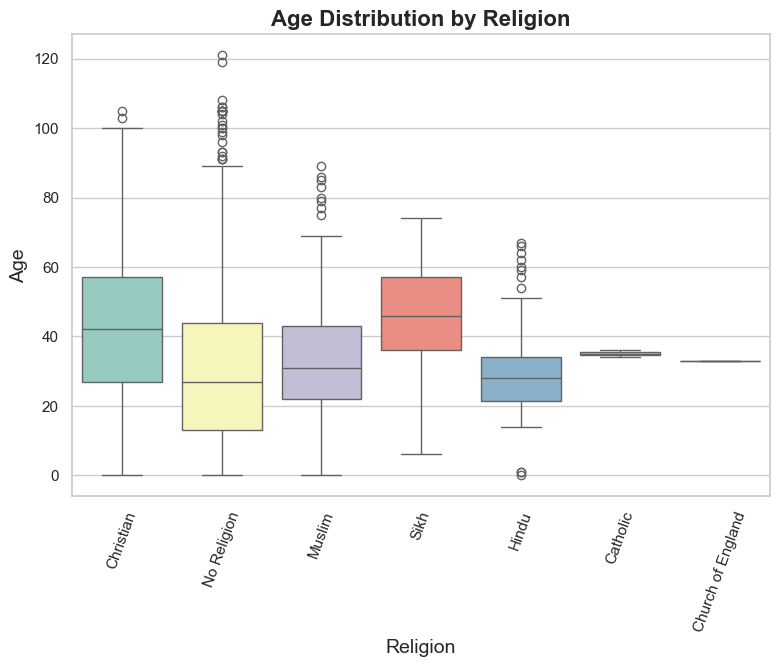

In [56]:
# visualisation plot

# Figure size for better visibility
plt.figure(figsize =(9, 6))

# Boxplot (Whisker Plot) to show the distribution of ages by religion
sns.boxplot(x ='Religion', y ='Age', data =valid_religions, hue = 'Religion', palette ='Set3')

# Title and axis labels
plt.title('Age Distribution by Religion', fontsize =16, fontweight ='bold')
plt.xlabel('Religion', fontsize =14)
plt.ylabel('Age', fontsize =14)

# Rotate x-axis labels for better reading
plt.xticks(rotation = 70)

# Show the plot
plt.show()

In [66]:
# (2ii) Since i already converted lies or fake religions to no religion. Working to analyse adults who did not answer or no religion.

# Filter adults (assuming adults are age 18 and above)
adults_df = my_df[my_df['Age'] >= 18]

# Filter adults who did not answer or are not identifiably religious
non_response_religions = ['No Answer', 'Unknown', 'N/A', '', None]
non_identifiable_religious = adults_df[adults_df['Religion'].isin(non_response_religions)]

# Compute statistics
non_identifiable_stats = non_identifiable_religious.groupby('Religion')['Age'].agg([
    ('Mean Age', 'mean'),
    ('Median Age', 'median'),
    ('Min Age', 'min'),
    ('Max Age', 'max'),
    ('Age Range', lambda x: x.max() - x.min()),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))])

# Compute mode separately
mode_non_identifiable = non_identifiable_religious.groupby('Religion')['Age'].apply(lambda x: mode(x)[0][0])
non_identifiable_stats['Mode Age'] = mode_non_identifiable

# Display the result
print("Age Statistics for Adults with Unanswered/Unidentifiable Religion:\n")
print(non_identifiable_stats)

Age Statistics for Adults with Unanswered/Unidentifiable Religion:

Empty DataFrame
Columns: [Mean Age, Median Age, Min Age, Max Age, Age Range, IQR, Mode Age]
Index: []


In [62]:
# Filter adults with 'No Religion'
no_religion_adults = adults_df[adults_df['Religion'] == 'No Religion']

# Compute statistics
no_religion_stats = no_religion_adults.groupby('Religion')['Age'].agg([
    ('Mean Age', 'mean'),
    ('Median Age', 'median'),
    ('Min Age', 'min'),
    ('Max Age', 'max'),
    ('Age Range', lambda x: x.max() - x.min()),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))])

# Calculate mode separately since groupby does not directly support mode
def mode_cal(series):
    m = mode(series)
    # Check if the mode result is an array with at least one value
    if isinstance(m.mode, (list, np.ndarray)) and len(m.mode) > 0:
        return m.mode[0]
    else:
        # Return mode if scalar or None if empty
        return m.mode if m.mode else None

mode_no_rreligion = no_religion_adults.groupby('Religion')['Age'].apply(mode_cal)
religion_age_stats['Mode Age'] = mode_ages

# Display the result
print("Age Statistics for Adults with No Religion:\n")
print(no_religion_stats)

Age Statistics for Adults with No Religion:

              Mean Age  Median Age  Min Age  Max Age  Age Range   IQR
Religion                                                             
No Religion  41.476512        39.0       18      121        103  25.0


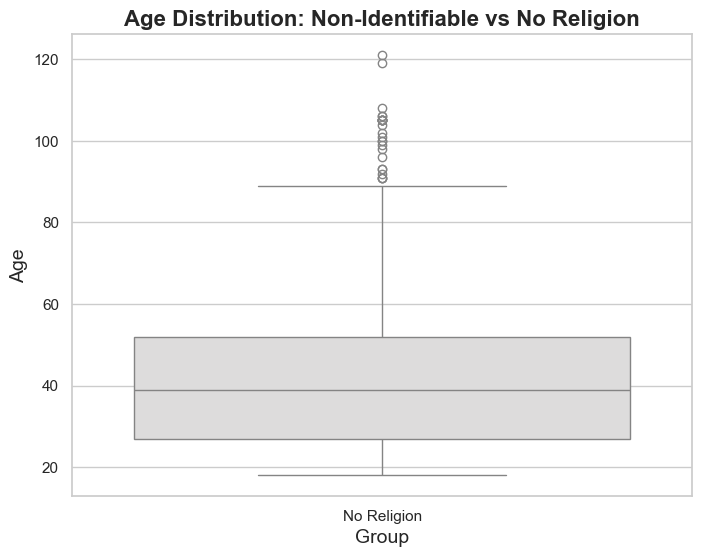

In [72]:
# Visualisation plot

# Combine the two groups for comparison (concatenate)
combined_df = pd.concat([non_identifiable_religious.assign(Group ='Non-Identifiable'),no_religion_adults.assign(Group ='No Religion')])

# Plot boxplot to compare age distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Age', data=combined_df, hue = 'Religion', palette='coolwarm')
plt.title('Age Distribution: Non-Identifiable vs No Religion', fontsize =16, fontweight ='bold')
plt.xlabel('Group', fontsize =14)
plt.ylabel('Age', fontsize =14)
plt.show()

2 (iii) 

Science.
What does the age range of the religious adherents tell us?
Are some religions only associated with older people?
Are some religions only associated with younger people?
Justify your answer

1. What does the age range of the religion adherents tell us?

   
   The age range reflects how widely different age groups are described within each religion. The widest age range is the Christain and No Religion group, having 105 and 121 years respectively. It shows both groups widely appear across almost all age groups, from infant to elderly.
   Catholic and church of England have smaller age ranges (0 and 2 years, respectively).
   Hindu, Muslim and Sikh appear to be moderate age ranges, indicating varying age diversity. Mostly middle aged groups.

   

2. Are some religions only associated with older people?

   
    Christian adherents have a high mean age of 42.6 years and a mode age of 44 years. This indicates a strong presence among older individuals.
   On the other hand, Sikh adherents have the highest mean age of 45 years and a mode of 36, this is suggesting that there is a skew towards middle aged and older adults
This can be concluded that Christian and Sikh religion appear to be more assiociated with older or middle aged individuals.


3. Are some religions only associated with younger people?


   Muslim and Hindu religion have mean age of 34.3 and 30,3 years respectively, with a mode of 30 and 20. This statistics implies that there is a stronger representation among younger adulths and youth.

   While No Religion group has a mean age of 30.1 and a young mode of 14, implying that a very high sinificant of young people identify with no religion.
    No Religion, Muslim, Hindu groups appear to be more prevalent among younger individuals. But there is a higher proportion young individuals with No Religion and this can be a reflection on sociatal shifts.  

No religion age group  with a mode of 14 shows that the younger generation are not looking towards organised religion, instead they are moving away, this can be as a result of change in cultural / social values. Additionally, Sikh, Hindu, and Muslim groups show moderate age diversity, which can be a reflection of immigration patterns.
We can justify that the wide age range of 0 - 105  in christian group shows it cuts across community of all age brackets.

This statistics has shown that there can be a future decline in traditional religious adherance

3(i)

Let’s project forward 10 years into the future!
Science.
How will the different religions grow or shrink? How can we predict this?
Coding.
Look at the data from within a given household. How often do children inherit their parents’
religion?
The answer probably won’t be 100%, but some religions might be more resistant to change than
others.
Can you give a percentage probability that a certain religion is then passed from parent to child,
per religion?
[NB: For the religions with the fewest adherents, it might be harder to determine the inheritance
rate from parent to child.]

How different religion will grow or shrink over the years can be through

1. Birth Rates. Religions concentrated with young populations and higher birth rates aare likely to grow.
   
2. Immigration and Emigration. Migration can bring religion into an area, in same vein it can remove religious population.

3. Secularisation. More people can identify as no religion if there is an increasing attitude in secularisation

4. Religious inheritance. Children adopting their parent religion can affect religion growth.

5. Conversion Rate. Some people can be converted by other religions.


We can predict that older people religion may shrink if younger generation don't adopt it. Also high inheritance will bring about stable religion growth.

In [78]:
# Coding


# Clean the 'Religion' column for consistency
my_df['Religion'] = my_df['Religion'].str.strip().str.title()

# Define parent and child relationship categories
parent_labels = ['Head', 'Husband', 'Wife', 'Partner']
child_labels = [
    'Son', 'Daughter', 'Grandson', 'Granddaughter',
    'Step-Son', 'Step-Daughter', 'Adopted Son', 'Adopted Daughter',
    'Daughter-In-Law']

# Filter the data to include only parents and children
family_df = my_df[my_df['Relationship to Head of House'].isin(parent_labels + child_labels)]

# Group by household
households = family_df.groupby(['House Number', 'Street'])

# Initialize inheritance counts
inheritance_counts = {}

# Iterate through each household
for _, group in households:
    # Identify parents' religions
    parents_religions = group[group['Relationship to Head of House'].isin(parent_labels)]['Religion'].unique()
    
    # Identify children's religions
    children_religions = group[group['Relationship to Head of House'].isin(child_labels)]['Religion']
    
    # Skip if no parents or no children in the household
    if len(parents_religions) == 0 or len(children_religions) == 0:
        continue

    # Compare children's religion with parents' religion
    for religion in parents_religions:
        if religion not in inheritance_counts:
            inheritance_counts[religion] = {'same': 0, 'total': 0}
        
        # Count how many children have the same religion as parents
        matches = (children_religions == religion).sum()
        total_children = len(children_religions)
        
        inheritance_counts[religion]['same'] += matches
        inheritance_counts[religion]['total'] += total_children

# Calculate inheritance percentages
inheritance_rates = {}
for religion, counts in inheritance_counts.items():
    if counts['total'] > 0:
        inheritance_rates[religion] = (counts['same'] / counts['total']) * 100
    else:
         # No data for this religion
        inheritance_rates[religion] = None 

# Display results
print("Religion Inheritance Rates (Parent to Child):\n")
for religion, rate in inheritance_rates.items():
    if rate is not None:
        print(f"{religion}: {rate:.2f}%")
    else:
        print(f"{religion}: No data available")

Religion Inheritance Rates (Parent to Child):

Christian: 48.36%
No Religion: 83.26%
Sikh: 33.33%
Muslim: 69.44%
Hindu: 47.06%


#### We can see from the statistics that 48.36 % of chritianity was passed from parent to children in religion. Moreso. Sikh,Muslim, and Hindu have a percentage per child of religion passed from parents to children as well.

We can predict future religious affiliations of the population in 10 years by, estimating the number of children that will be born into each religion.

Use age-specific death rate to model the impact on each religion.

In [85]:
# 3(ii)

# Get death rates, birth rates by religion

# Group population by religion
population_by_religion = my_df.groupby('Religion').size()

# Estimate number of births (Age 0-4) by religion
births_by_religion = my_df[my_df['Age'].between(0, 4)].groupby('Religion').size()

# Estimate number of deaths (Age 90+) by religion
deaths_by_religion = my_df[my_df['Age'] >= 90].groupby('Religion').size()

# Calculate birth rate per 1,000 people for each religion
birth_rate_by_religion = (births_by_religion / population_by_religion) * 1000

# Calculate death rate per 1,000 people for each religion
death_rate_by_religion = (deaths_by_religion / population_by_religion) * 1000

# Replace NaN with 0 for religions with no births or deaths
birth_rate_by_religion = birth_rate_by_religion.fillna(0)
death_rate_by_religion = death_rate_by_religion.fillna(0)

# Display the results
print("Estimated Birth Rate by Religion (per 1,000 people):\n")
print(birth_rate_by_religion)

print("\nEstimated Death Rate by Religion (per 1,000 people):\n")
print(death_rate_by_religion)

Estimated Birth Rate by Religion (per 1,000 people):

Religion
Catholic              0.000000
Christian            20.843551
Church Of England     0.000000
Hindu                40.540541
Muslim               48.000000
No Religion          91.329712
Sikh                  0.000000
dtype: float64

Estimated Death Rate by Religion (per 1,000 people):

Religion
Catholic             0.000000
Christian            3.678274
Church Of England    0.000000
Hindu                0.000000
Muslim               0.000000
No Religion          5.230336
Sikh                 0.000000
dtype: float64


In [91]:
# Calculate the current population by religion
current_population = my_df['Religion'].value_counts().to_dict()

# Initialize total births and deaths counters
total_births_over_10_years = 0
total_deaths_over_10_years = 0

# Time frame 10 years
years = 10

# Calculate total births and deaths for each religion
for religion in current_population:
    pop = current_population[religion]

    # Convert rates from per 1,000 to decimal form
    birth_rate = birth_rate_by_religion.get(religion, 0) / 1000
    death_rate = death_rate_by_religion.get(religion, 0) / 1000
    inheritance_rate = inheritance_rates.get(religion, 0) / 100

    # Estimate total births over 10 years
    total_births = pop * birth_rate * years * inheritance_rate

    # Estimate total deaths over 10 years
    total_deaths = pop * death_rate * years

    # Add to total counts
    total_births_over_10_years += total_births
    total_deaths_over_10_years += total_deaths

# Display total births and deaths over 10 years
print(f"Total Estimated Births Over 10 Years: {int(total_births_over_10_years)}")
print(f"Total Estimated Deaths Over 10 Years: {int(total_deaths_over_10_years)}")

Total Estimated Births Over 10 Years: 4247
Total Estimated Deaths Over 10 Years: 410


In [95]:
# Exercise 3 (iii)

# Distribution of religions of those who will die in the next 10 years


# Initialize a dictionary to store deaths by religion
deaths_by_religion = {}

# Calculate deaths for each religion
for religion in current_population:
    pop = current_population[religion]
    
    # Get death rate (per 1,000) and convert to decimal
    death_rate = death_rate_by_religion.get(religion, 0) / 1000  
    
    # Estimate total deaths over 10 years
    total_deaths = pop * death_rate * years
    
    # Store in dictionary
    deaths_by_religion[religion] = int(total_deaths)

# Display deaths distribution by religion
print("Estimated Deaths by Religion Over the Next 10 Years:\n")
for religion, deaths in deaths_by_religion.items():
    print(f"{religion}: {deaths}")

Estimated Deaths by Religion Over the Next 10 Years:

No Religion: 260
Christian: 150
Muslim: 0
Hindu: 0
Sikh: 0
Catholic: 0
Church Of England: 0


In [97]:
# Distribution of religion of those who will reach 16 or older in the next 10 years considering inheritance

# Filter people who are currently under 16
under_16 = my_df[my_df['Age'] < 16]

# Initialize a dictionary to store counts of those turning 16+ in 10 years
future_16_plus_by_religion = {}

# Calculate how many will turn 16 or older in 10 years by religion
for religion in under_16['Religion'].unique():
    pop = under_16[under_16['Religion'] == religion].shape[0]
    
    # Get inheritance rate
    inheritance_rate = inheritance_rates.get(religion, 0) / 100  
    
    # Estimate how many will adopt the religion
    inherited_religion_count = pop * inheritance_rate  
    
    future_16_plus_by_religion[religion] = int(inherited_religion_count)

# Display the distribution
print("\nEstimated Number of People Reaching Age 16+ in 10 Years by Religion:\n")
for religion, count in future_16_plus_by_religion.items():
    print(f"{religion}: {count}")


Estimated Number of People Reaching Age 16+ in 10 Years by Religion:

Christian: 179
No Religion: 1283
Muslim: 10
Hindu: 2
Sikh: 0


In [99]:
# Analysis of those still under 16 in 10 years

# Calculate how many will still be under 16 in 10 years
# Age + 10 < 16 → Age < 6 now
still_under_16 = my_df[my_df['Age'] < 6]  

# Count distribution by religion
still_under_16_by_religion = still_under_16['Religion'].value_counts().to_dict()

# Display the results
print("\nEstimated Number of People Still Under 16 in 10 Years by Religion:\n")
for religion, count in still_under_16_by_religion.items():
    print(f"{religion}: {count}")


Estimated Number of People Still Under 16 in 10 Years by Religion:

No Religion: 554
Christian: 107
Muslim: 6
Hindu: 3


Do you think they will also be attending the new religious building with their parents? Justify your answer

Research has shown that children are always influenced by their parents till they attain adulthood, meaning they will go with their parents to religious places, thereby increasing demand for religious facilities.

## Exercise 4

How healthy is the population, how can we anticipate the future medical needs?

We can use infirmity column to access how many people currently have medical conditions, also examine how many older individuals in age range 80+ may need care. 

In [124]:
# Count how many people have reported infirmities

# Define values that represent no medical condition
no_infirmity_values = ['No', 'Unknown', ' ', 'Likely']

# Filter out people with no infirmities
infirm_population = my_df[~my_df['Infirmity'].isin(no_infirmity_values)].shape[0]
total_population = my_df.shape[0]

# Calculate the percentage of people with medical conditions
infirmity_percentage = (infirm_population / total_population) * 100

print(f"Percentage of the population with medical conditions: {infirmity_percentage:.2f}%")

Percentage of the population with medical conditions: 11.04%


In [116]:
infir_list = my_df['Infirmity'].unique()
print(infir_list)

['No' 'Yes' 'Likely' 'Broken Arm' 'Unknown' 'Mental Disability' 'Disabled'
 'Unknown Infection' 'Deaf' 'Blind' 'Physical Disability' ' ']


Fraction of over 80s in the population. We will do this by identifying the number of people that are over 80 years old.We can then predict how the number will change in 10 years, accounting for death rates

In [118]:
# Current number of people over 80
over_80_population = my_df[my_df['Age'] >= 80].shape[0]

# Calculate the fraction of over-80s in the total population
over_80_fraction = (over_80_population / total_population) * 100

print(f"Current fraction of the population over 80: {over_80_fraction:.2f}%")

Current fraction of the population over 80: 2.81%


In [120]:
# Predicting over 80s population in 10 years

# Estimate how many 70-79 year-olds will age into the 80+ category over the next 10 years
current_70_79 = my_df[(my_df['Age'] >= 70) & (my_df['Age'] < 80)].shape[0]

# Apply death rate for elderly groups (assuming a higher rate, e.g., 50 deaths per 1,000 per year)
elderly_death_rate = 50 / 1000
surviving_70_79 = current_70_79 * ((1 - elderly_death_rate) ** years)

# Future over-80 population = current over-80s surviving + 70-79s aging into over-80
future_over_80_population = (over_80_population * ((1 - elderly_death_rate) ** years)) + surviving_70_79
future_over_80_fraction = (future_over_80_population / total_population) * 100

print(f"Estimated fraction of the population over 80 in 10 years: {future_over_80_fraction:.2f}%")

Estimated fraction of the population over 80 in 10 years: 4.44%


The estimated population over 80 in 10 years has an increase of 4.44%, this will cause a greater demand for elderly care service.

In [122]:
# What is the expected birth rate in the next 10 years

# Count females in childbearing age assumming it is (15-49)
females_childbearing_age = my_df[(my_df['Gender'] == 'Female') & (my_df['Age'].between(15, 49))].shape[0]

# Assume an average birth rate (e.g., 60 births per 1,000 women annually)
avg_birth_rate_per_1000 = 60 / 1000

# Estimate total births over the next 10 years
estimated_births_10_years = females_childbearing_age * avg_birth_rate_per_1000 * years

print(f"Estimated number of births in the next 10 years: {int(estimated_births_10_years)}")

Estimated number of births in the next 10 years: 1612


## Exercise 5

One of the many ways to balance competing needs among commuters, residents, religious groups and healthcare services is;

Prioritise the construction of affordable, diverse housing to address both overcrowding and underutilisation

Invest in new trains station or upgrade existing ones.

And we can access whether existing religious centers can be expanded rather than building new ones 

Reference.

Wes Mckinney, Python for Data Analysis, Data Wrangling with Pandas, Numpy and Ipython